### Importing Libraries for Data Analaysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing Libraries for Data Analysis
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sas
from google.colab import drive
import glob

### Loading Data in DataFrames

In [3]:
# Load all TCP_IP-DDoS-TCP pcap files into a list of dataframes
all_dfs = [pd.read_csv(one) for one in glob.glob('/content/drive/MyDrive/MINI/TCP_IP-DDoS-TCP*.pcap.csv')]

# Load all CSV files from the CSV directory into a list of dataframes
all_sr = [pd.read_csv(one) for one in glob.glob('/content/drive/MyDrive/CSV/*.csv')]

### Adding column for identification of attacks

In [4]:
for f in all_dfs:
  f['Attack']=1

for df in all_sr:
  f['Attack']=0

### Concating Both Dataframes

In [5]:
dfs= all_sr.append(all_dfs)
df=pd.concat(all_dfs)

In [6]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack
0,54.0,6.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,54.0,1.016353e+08,9.5,10.392305,0.0,0.0,0.0,141.55,1
1,54.0,6.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,54.0,8.469605e+07,9.5,10.392305,0.0,0.0,0.0,141.55,1
2,54.0,6.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,54.0,8.469605e+07,9.5,10.392305,0.0,0.0,0.0,141.55,1
3,54.0,6.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,54.0,8.469605e+07,9.5,10.392305,0.0,0.0,0.0,141.55,1
4,54.0,6.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,54.0,8.469605e+07,9.5,10.392305,0.0,0.0,0.0,141.55,1


In [7]:
df.tail()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack
93484,54.00,6.00,64.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.469612e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,0
93485,54.00,6.00,64.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.469612e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,0
93486,53.46,5.94,63.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.083826,54.06,8.469612e+07,9.5,10.394315,0.119002,0.118214,0.06,141.55,0
93487,54.00,6.00,64.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.469612e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,0
93488,54.00,6.00,64.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.469612e+07,9.5,10.390000,NaN,NaN,NaN,NaN,0


### Preparing Data for Balancing

In [8]:
from imblearn.over_sampling import SMOTE
X = df.drop(columns=['Attack'])
y = df['Attack']

### Handling Missing Values

In [9]:
df = df.dropna(axis=1)

### Balancing the Dataset

In [10]:
# Split data into train and test sets
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
# Impute NaN values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

### Converting the resampled data back to DataFrame

In [11]:
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Attack'] = y_resampled

### Saving resampled file to CSV file

In [12]:
resampled_df.to_csv("balanced_IDS.csv", index=False)
df=pd.read_csv("balanced_IDS.csv")

X = df.drop(columns=['Attack'])
y = df['Attack']

### Plotting Pie Chart

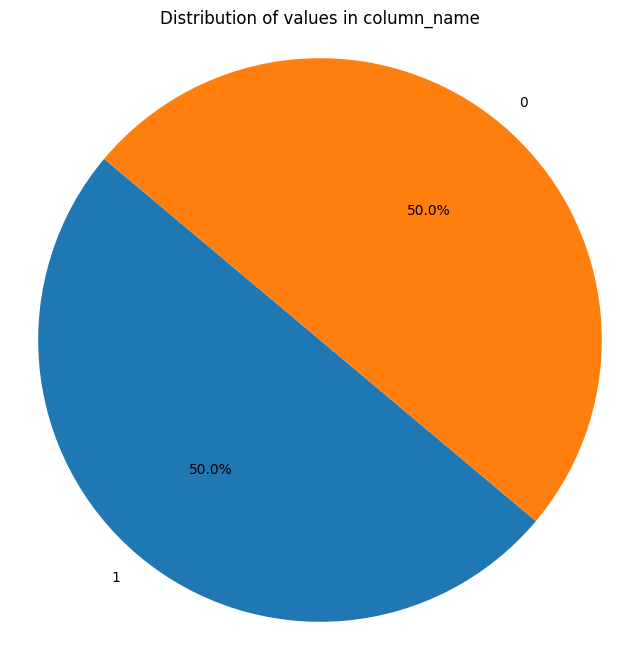

In [14]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'column_name' is the name of the column you want to plot
column_counts = df['Attack'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of values in column_name')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Splitting Data for model Evaluation

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training a Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(X_train,y_train)

# Make predictions
y_pred = lg.predict(X_test)

### Evaluate Model Performance

In [25]:
# Import necessary modules
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
y_pred = lg.predict(X_test) # You need to generate predictions first
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.4864705847351458
Mean Squared Error (MSE): 0.24216919004696583
Root Mean Squared Error (RMSE): 0.4921068888432327
R-squared (R2): 0.031321577604748074


### Training a Decision Tree Classifier Model

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

### Decision Tree Model Evaluation

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming y_test contains the true class labels and y_pred contains the predicted class labels
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1-score:",f1)

Accuracy: 0.9938275999544367
Precision: 0.9987041596475315
Recall: 0.9889221556886227
F1-score: 0.9937890868453289


### Confusion Matrix Visualization

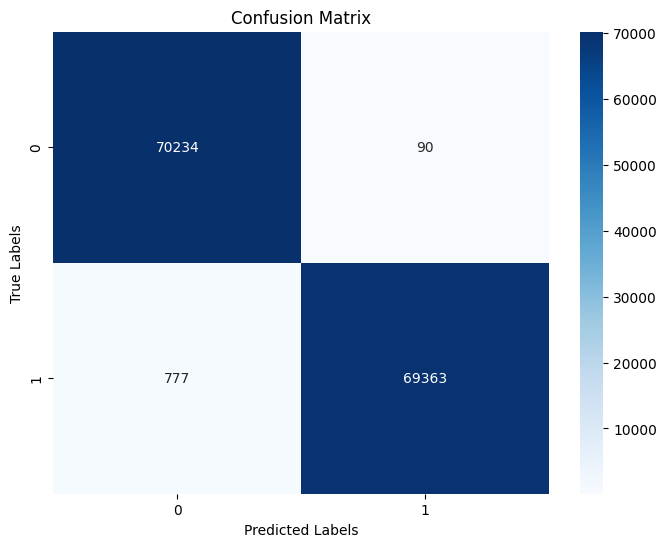

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Classifier Model Training

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_proba = rf_classifier.predict_proba(X_test)
y_pred=rf_classifier.predict(X_test)

### Random forest Model Evaluation

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming y_test contains the true class labels and y_pred contains the predicted class labels
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1-score:",f1)

Accuracy: 0.9938204806925618
Precision: 0.999380028259177
Recall: 0.9882378100940975
F1-score: 0.9937776885690118


### Confusion Matrix Visualization

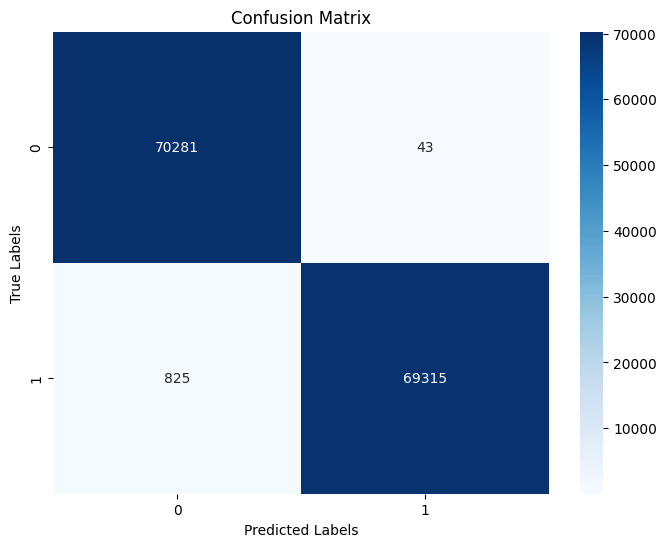

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()